In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

df_pj2018 = pd.read_csv("./ks-projects-201801.csv")
display((df_pj2018).head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [67]:
df_pj2018['status_conv'] = df_pj2018['state'] == 'successful' 

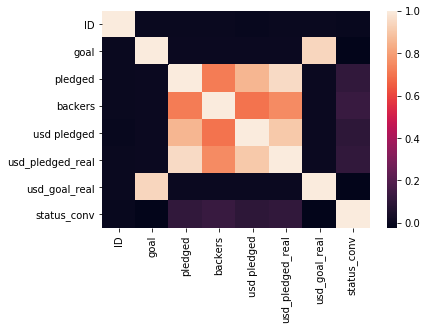

In [68]:
sns.heatmap(df_pj2018.corr())
plt.show()

In [69]:
df_pj2018.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,status_conv
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000025,0.001854,-0.001200
goal,0.001679,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692,-0.024332
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024,0.111534
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517,0.129109
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172,0.097791
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596,0.110704
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000,-0.023052
status_conv,-0.001200,-0.024332,0.111534,0.129109,0.097791,0.110704,-0.023052,1.000000


In [90]:
# ロジスティック回帰によるフィッティングモデル生成

#教師データ
df = df_pj2018[0:100000] 

y = df["status_conv"].values
X = df[["goal", "backers","pledged"]].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

# フィッティングしたモデルを用いて予測値を計算
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(-log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

# 混同行列
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), index=['正解 = 失敗', '正解 = 成功'], columns=['予測値 = 失敗', '予測値 = 成功'])
conf_mat

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


対数尤度 = -0.515
正答率 = 98.510%


,予測値 = 失敗,予測値 = 成功
正解 = 失敗,63532,830
正解 = 成功,660,34978


In [91]:
# テストデータ
df1 = df_pj2018[100000:]

y1 = df1["status_conv"].values
X1 = df1[["goal", "backers","pledged"]].values

# フィッティングしたモデルを用いて予測値を計算
y_est1 = clf.predict(X1)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(-log_loss(y1, y_est1)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y1, y_est1)))

# 混同行列
conf_mat = pd.DataFrame(confusion_matrix(y1, y_est1), index=['正解 = 失敗', '正解 = 成功'], columns=['予測値 = 失敗', '予測値 = 成功'])
conf_mat

対数尤度 = -0.514
正答率 = 98.511%


,予測値 = 失敗,予測値 = 成功
正解 = 失敗,177984,2359
正解 = 成功,1790,96528
